In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    LabelEncoder,
    StandardScaler,
    PolynomialFeatures,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [185]:
# preparando os dados

dataset = pd.read_csv(
    r"Machine Learning A-Z (Codes and Datasets)\Part 1 - Data Preprocessing\Section 2 -------------------- Part 1 - Data Preprocessing --------------------\Python\Data.csv"
)

# pega os valores numericos

X = dataset.iloc[:, :-1].values

# pega a ultima coluna

y = dataset.iloc[:, -1].values

# preenche as celulas vazias com a media dos valores

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

# codificando a variavel independente

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [0])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))

# codificando a variavel dependente

le = LabelEncoder()
y = le.fit_transform(y)


In [186]:
# separando o dataset em training set e test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [187]:
# feature scaling

sc = StandardScaler()

X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])


In [188]:
# simple linear regression

# preparando os dados

dataset = pd.read_csv(
    r"Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 4 - Simple Linear Regression\Python\Salary_Data.csv"
)

# pega os valores numericos

X = dataset.iloc[:, :-1].values

# pega a ultima coluna

y = dataset.iloc[:, -1].values

In [189]:
# simple linear regression 2

# separando o dataset em training set e test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [190]:
# treinando o modelo de regressao linear no training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [191]:
# prevendo os resultados do test set

y_pred = regressor.predict(X_test)

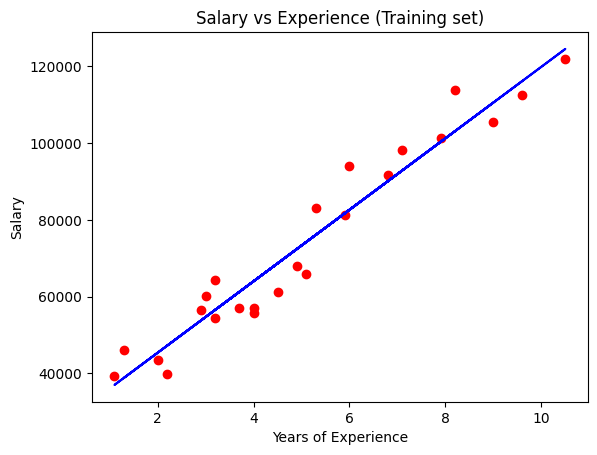

In [192]:
# visualizando os resultados do training set

plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.show()

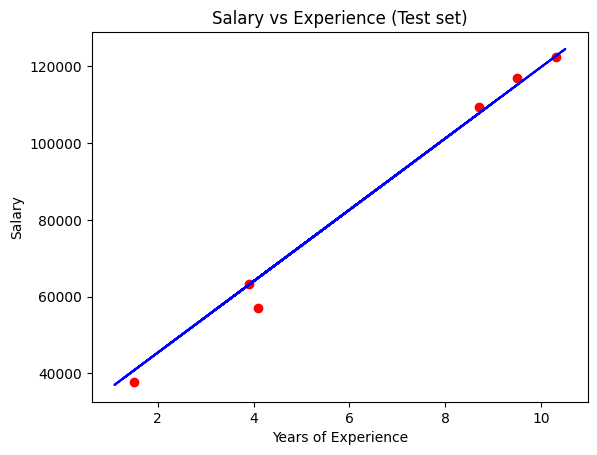

In [193]:
# visualizando os resultados do test set

plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.show()

In [194]:
# multiple linear regression model

# importando dataset

dataset = pd.read_csv(
    r"Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 5 - Multiple Linear Regression\Python\50_Startups.csv"
)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# codificando a variavel categorica

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [3])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))

# separando o dataset em training set e test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [195]:
# multiple linear regression model 2

# treinando o modelo de multipla regressao linear no training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [196]:
# prevendo os resultados do test set

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

# left predicted, right test values
print(
    np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
)


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [197]:
# polynomial regeression - predicting salaries

# importing the dataset

dataset = pd.read_csv(
    "Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 6 - Polynomial Regression\Python\Position_Salaries.csv"
)

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# build linear regression model

lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

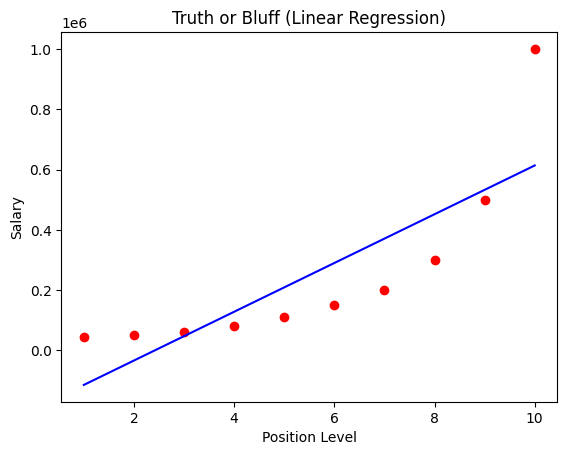

In [198]:
# training the polynomial regression model on the whole dataset

poly_reg = PolynomialFeatures(degree=4)

X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

# real results

plt.scatter(X, y, color="red")

# prediction linear regression

plt.plot(X, lin_reg.predict(X), color="blue")

plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.show()

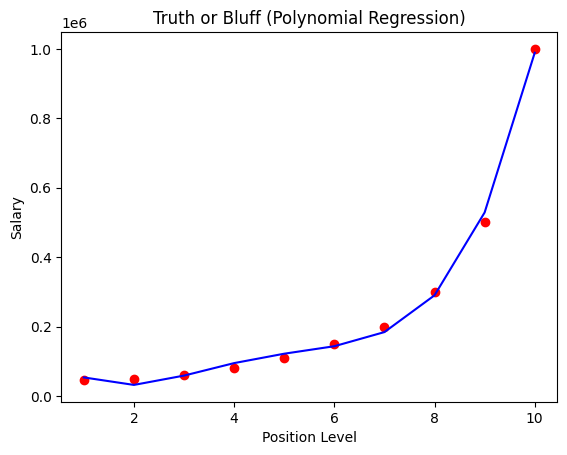

In [199]:
# real results

plt.scatter(X, y, color="red")

# prediction polynomial regression

plt.plot(X, lin_reg_2.predict(X_poly), color="blue")

plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.show()


In [200]:
# predicting a new result with linear regression

feature_value = [[6.5]]

lin_reg.predict(feature_value)


array([330378.79])

In [201]:
# predicting a new result with polynomial regression

feature_value = poly_reg.fit_transform([[6.5]])

lin_reg_2.predict(feature_value)


array([158862.45])

In [202]:
# support vector regression

y = y.reshape(len(y), 1)

# feature scaling

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# training the SVR model on the whole dataset

regressor = SVR(kernel="rbf")

regressor.fit(X, y)

# predicting a new result

feature = sc_X.transform([[6.5]])

prediction = regressor.predict(feature)

prediction = sc_y.inverse_transform(prediction.reshape(-1, 1))

print(prediction)

[[170370.02]]


c:\Users\Guilherme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


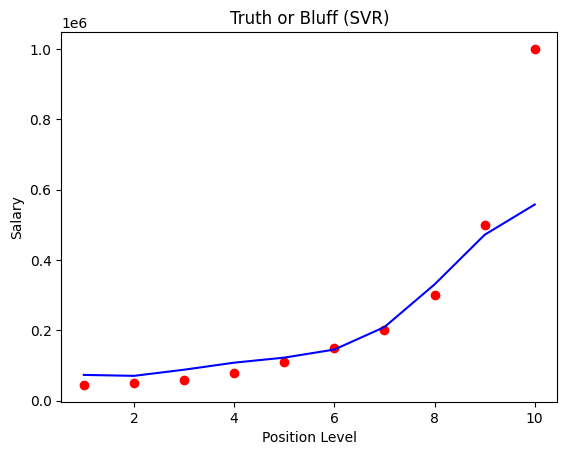

In [203]:
# visualizing the SVR results

# real results

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")

# prediction SVR

plt.plot(
    sc_X.inverse_transform(X),
    sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)),
    color="blue",
)

plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.show()

In [204]:
# decision tree regression

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)


DecisionTreeRegressor(random_state=0)

In [205]:
# predicting a new result

regressor.predict([[6.5]])

array([150000.])

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_1924\625397721.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


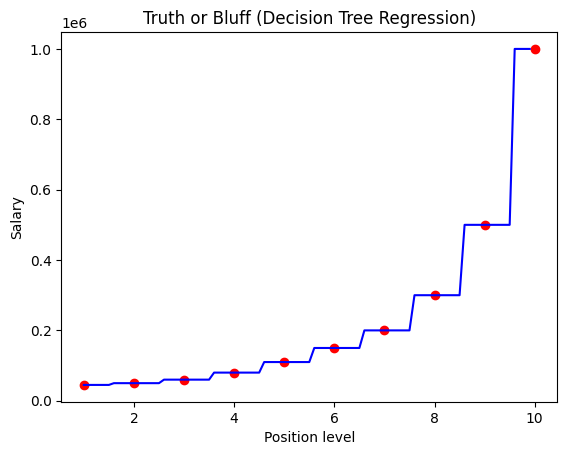

In [206]:
# visualizing the decision tree regression results

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")
plt.title("Truth or Bluff (Decision Tree Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [207]:
# random forest regression

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X, y)


RandomForestRegressor(n_estimators=10, random_state=0)

In [208]:
# predicting a new result

regressor.predict([[6.5]])

array([167000.])

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_1924\143541059.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


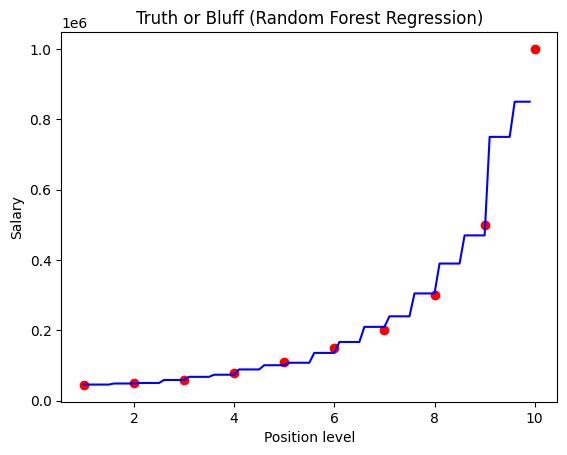

In [209]:
# visualizing the random forest regression results

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")
plt.title("Truth or Bluff (Random Forest Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()